In [ ]:
# import libraries 
# pandas are for working with dataframes 
import pandas as pd 
# files are for uploading to and downloading from google collab 
from google.colab import files 
import io
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# upload file to google colab 
uploaded = files.upload()

Saving training_data_3.csv to training_data_3.csv


In [ ]:
# reading from file and converting to DataFrame 
data = pd.read_csv(io.StringIO(uploaded['training_data_3.csv'].decode('utf-8')), index_col=0)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,Response
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
R1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,...,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,2000
R2,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,...,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,2000
R3,50.95714,31.85602,NaN,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,...,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,2000
R4,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,NaN,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,...,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,2000
R5,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,...,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.2369

In [ ]:
# Balance of data (Qty of 1900s & 2000s songs from dataset): Data is not balance
data['Response'].value_counts()

2000    70124
1900    49875
Name: Response, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


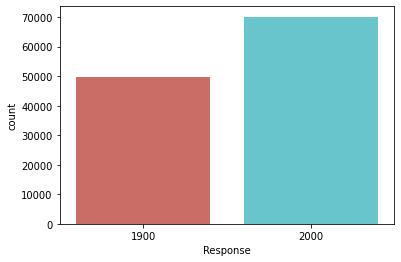

In [ ]:
import seaborn as sns # Library for visualization

# Visualizing balance of data (Histogram)
sns.countplot(x=data['Response'], palette='hls')

In [ ]:
# As we have NaN (missing) values we will impute using KNN

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

data_imputed = data.iloc[0:,0:92]
data_imputed = imputer.fit_transform(data_imputed)

In [ ]:
# As a result from the previous step we obtained a Matrix, so we have to transform the Matrix to a DataFrame
data_imputed = pd.DataFrame(data_imputed)
# We insert the missing headers from previous step
data_imputed = pd.DataFrame(data=data_imputed.values, columns=data.columns)
data_imputed

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,Response
0,49.94357,21.471140,73.077500,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.089600,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,...,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,2000.0
1,48.73215,18.429300,70.326790,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.406960,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,...,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061,2000.0
2,50.95714,31.856020,30.048957,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.009540,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,...,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345,2000.0
3,48.24750,-1.898370,36.297720,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,1868.88507,697.433460,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,...,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382,2000.0
4,50.97020,42.209980,67.099640,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.866150,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,...,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,

In [ ]:
# We get rid of "Response" column and create our variable X
X = data_imputed.drop('Response', axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,49.94357,21.471140,73.077500,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.089600,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.429300,70.326790,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.406960,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.856020,30.048957,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.009540,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.898370,36.297720,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,1868.88507,697.433460,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.209980,67.099640,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.866150,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.0789

In [ ]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
X = scale.fit_transform(X)
X

array([[ 1.08484979,  0.38230761,  1.83301336, ..., -0.47490653,
        -0.24928386,  0.03471594],
       [ 0.88563618,  0.32331107,  1.7543896 , ...,  0.5747026 ,
         0.21769477,  1.15566789],
       [ 1.25152768,  0.58372254,  0.60312505, ..., -0.34145925,
         0.11568639, -0.09833622],
       ...,
       [ 0.54359105,  0.22261272, -0.35782773, ...,  0.01150141,
         0.03757536, -0.44959527],
       [ 0.12686425,  0.07070778,  0.90330494, ...,  0.42119253,
        -0.03353691,  0.20935145],
       [ 0.21471149, -0.45922338, -0.07223902, ...,  0.12985639,
         1.86968925,  0.57905956]])

In [ ]:
# We get rid of the rest of the columns and create our variable Y
Y = data_imputed.iloc[:, -1]
Y

0         2000.0
1         2000.0
2         2000.0
3         2000.0
4         2000.0
           ...  
119994    2000.0
119995    2000.0
119996    2000.0
119997    2000.0
119998    2000.0
Name: Response, Length: 119999, dtype: float64

In [ ]:
# We create X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split #function to create X_train, X_test, Y_train, Y_test
# As we have imbalance data we use "stratify = data_imputed.Response" 
# so we make sure to obtain the same amount of "2000s" and "1900s" in the training & testing dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .15,random_state = 42, shuffle = True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(101999, 90)
(18000, 90)
(101999,)
(18000,)


In [ ]:
sm = SMOTE(k_neighbors=6, random_state=42)
X_train_set,Y_train_set = sm.fit_sample(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(Y_train_set)

Counter({1900.0: 59491, 2000.0: 59491})

In [ ]:
# Now we use MLP classifier as Neural Network in our datasets
model_MLP = MLPClassifier(random_state= 42, max_iter=300)
model_MLP.fit(X_train_set,Y_train_set)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
Y_predict = model_MLP.predict(X_test)

In [ ]:
accuracy_MLP = accuracy_score(Y_test,Y_predict)
accuracy_MLP

0.7459444444444444

In [ ]:
confusion_matrix_MLP = confusion_matrix(Y_test,Y_predict)
confusion_matrix_MLP

array([[5419, 1948],
       [2625, 8008]])

In [ ]:
classification_report_MLP = classification_report(Y_test,Y_predict)
classification_report_MLP

'              precision    recall  f1-score   support\n\n      1900.0       0.67      0.74      0.70      7367\n      2000.0       0.80      0.75      0.78     10633\n\n    accuracy                           0.75     18000\n   macro avg       0.74      0.74      0.74     18000\nweighted avg       0.75      0.75      0.75     18000\n'

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# We did Grid Search of the MLP Classifier parameters to increase our accuracy
param_grid_MLP = [{
    'hidden_layer_sizes': [150,150],
   'learning_rate':['adaptive','constant'] 
}]

In [ ]:
grid_search_MLP = GridSearchCV(estimator=model_MLP,param_grid=param_grid_MLP,n_jobs=-1, cv=3)


In [ ]:
grid_search_MLP.fit(X_train_set,Y_train_set)
grid_search_MLP.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'hidden_layer_sizes': 150, 'learning_rate': 'adaptive'}

In [ ]:
#Now we apply the best Grid Search parameters into our Model
best_grid_search_MLP = grid_search_MLP.best_estimator_
best_grid_search_MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predict_best_grid_search_MLP = best_grid_search_MLP.predict(X_test)


In [ ]:
accuracy_grid_MLP = accuracy_score(Y_test,predict_best_grid_search_MLP)
accuracy_grid_MLP

0.7392222222222222

In [ ]:
classification_report_grid_MLP = classification_report(Y_test, predict_best_grid_search_MLP)
classification_report_grid_MLP

'              precision    recall  f1-score   support\n\n      1900.0       0.67      0.71      0.69      7367\n      2000.0       0.79      0.76      0.77     10633\n\n    accuracy                           0.74     18000\n   macro avg       0.73      0.74      0.73     18000\nweighted avg       0.74      0.74      0.74     18000\n'

In [ ]:

# We visualize the actual values and predicted values

df = pd.DataFrame({'Actual': Y_test, 'Predicted': predict_best_grid_search_MLP})
df

,Actual,Predicted
58007,1900.0,1900.0
65259,1900.0,1900.0
77955,2000.0,2000.0
7168,2000.0,2000.0
73437,2000.0,2000.0
...,...,...
42268,2000.0,2000.0
63194,2000.0,2000.0
3785,1900.0,1900.0
24455,2000.0,2000.0


In [ ]:
# Now we are going to make predictions on the testing data set
# upload file to google colab for TESTING DATA
uploaded = files.upload()

Saving imbalanced_testing_data_3_predictor_values.csv to imbalanced_testing_data_3_predictor_values.csv


In [ ]:
# Reading from file and converting to DataFrame 
data_test = pd.read_csv(io.StringIO(uploaded['imbalanced_testing_data_3_predictor_values.csv'].decode('utf-8')), index_col=0)
data_test

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
R120276,50.43982,56.96291,17.09546,0.24842,-19.36083,-21.86113,1.03816,6.69913,8.57670,5.47418,0.49744,-4.45571,8.84113,635.76212,585.81579,712.44873,578.42254,452.84324,262.78793,231.42991,224.90024,179.89478,171.50786,173.75732,-10.13484,-149.01849,-121.35946,73.53042,89.65955,43.26720,-59.27990,32.00996,1.12112,-53.80705,34.45872,8.83386,-114.53630,-91.86391,-149.34090,-93.98777,...,-39.50813,82.62996,35.00199,7.22074,7.73571,-127.03449,126.16965,78.36386,79.44999,71.75555,-64.79342,17.14745,8.35425,-15.98637,-43.74863,-18.80040,8.37964,-77.77431,14.72826,-7.32914,-8.83015,-78.80109,-62.26272,4.84011,-19.01563,4.58649,-34.52451,107.27825,53.11923,-56.48441,-7.24480,-142.41765,-45.58650,35.07655,-4.31758,54.87170,12.40691,4.78372,32.23493,-0.39086
R130598,43.47337,54.07815,15.60170,-0.39215,26.47069,-5.21006,-12.00949,5.88753,-2.87373,1.99769,-0.61535,5.99860,23.24965,1789.40756,2831.00764,1540.40626,633.11850,812.45608,558.78666,483.28262,517.37627,320.04882,286.29847,292.73334,-21.35405,-371.49398,261.81673,-142.75538,-31.10033,132.15137,-10.99455,-37.01411,4.26041,-16.02938,0.64807,146.40590,-177.94346,-168.43174,-124.03868,-146.23163,...,18.79054,-6.74367,-30.53045,97.14659,-43.54959,-162.33920,316.53328,254.53930,-106.64509,103.63461,-12.35492,-88.99677,29.83048,-74.40415,-146.69970,12.86901,32.65757,16.74180,-51.48877,11.38663,-68.26545,59.69360,-113.17889,34.87071,38.22718,5.01141,186.16636,146.13337,-209.55105,-54.33889,17.03787,32.74231,103.62181,-13.52961,1.50083,-21.07148,161.58748,6.38670,-119.52102,18.49513
R121971,36.60648,-58.01520,15.88451,-11.82690,-85.07492,-16.69540,-2.46864,-5.33331,36.24635,12.25089,-3.74329,-14.03886,45.69416,1462.48158,1498.62768,485.47385,531.70027,279.80482,396.99725,132.07996,815.51775,151.22098,123.07955,595.34434,-91.71351,-311.76414,435.37669,-91.16143,-94.16791,-8.09676,66.99366,-36.35340,211.76117,-26.32444,74.57814,200.57507,-102.46720,-156.80734,11.51002,95.55834,...,84.47389,37.95153,3.98774,-209.46501,-55.38240,-20.92209,-47.07833,-52.24517,-123.66690,3.32054,-32.14135,-6.05512,30.45375,65.30050,-14.39689,155.47819,-23.62552,19.59544,72.62910,-37.75799,-85.16287,514.49652,25.61551,-29.87498,-44.81905,-16.45247,-171.80237,138.02484,-38.75016,13.76781,90.10547,-37.79651,40.80857,-87.99529,10.99778,-24.94432,-318.67794,12.52272,142.49989,-30.07328
R124532,40.92373,18.35173,-5.97083,-2.45185,3.97859,-29.04785,38.51024,-2.28285,6.95424,7.36304,-1.43263,-2.21820,9.56348,1293.87281,403.18380,359.40413,295.38926,264.62759,152.20613,189.07448,229.87632,182.21038,108.13142,134.01393,44.52832,188.34252,36.46904,-52.06844,-13.86177,41.61264,-1.55913,8.82839,50.17103,-11.32348,-2.65940,25.35873,-32.57644,37.77360,-34.08922,13.90197,...,38.63890,-13.72705,14.07106,4.39809,6.29474,12.02277,61.39440,-39.65419,-43.43801,-33.89669,12.06054,-5.53840,2.78247,19.24487,14.04532,-36.65601,-92.73117,42.23407,-8.48543,9.51738,9.83186,-40.66100,16.51325,6.23575,-16.49020,0.35225,-181.72965,-1.26856,-53.08402,21.11227,-8.29709,-221.69838,9.51064,0.15124,-6.70071,9.88560,38.90269,-0.37726,127.94281,6.30517
R121970,43.51075,-33.49830,30.76363,-2.23313,-52.90878,-11.37809,-0.19756,-7.96882,16.67394,-3.91085,-0.53656,-4.16819,28.12162,1542.10485,1063.36570,350.21371,916.38084,292.39746,354.79251,257.61829,508.15610,342.02244,84.02417,202.42018,77.95649,-260.96100,43.14361,-35.85007,-52.45297,-41.52267,64.15312,52.06656,124.40955,-54.92936,29.69305,72.12149,-92.43439,-208.18468,4.33104,128.48413,...,-47.26433,14.54587,-1.57156,-5.50371,52.21349,62.65336,9.69303,-122.60229,58.34986,-149.36208,-18.64029,-0.2461

In [ ]:
# We check if we have NaN values 
data_test.isnull().sum().sum() 
# We check if we have Zero values 
(data_test == 0).astype(int).sum(axis=0)

X1     0
X2     0
X3     0
X4     0
X5     0
      ..
X86    0
X87    0
X88    0
X89    0
X90    0
Length: 90, dtype: int64

In [ ]:
# We make the predictions

Y_hat = best_grid_search_MLP.predict(data_test)
Y_hat

array([2000., 2000., 2000., ..., 2000., 2000., 2000.])

In [ ]:
# We make some final adjustments to present the predicted data
y_hat = pd.DataFrame(data=Y_hat)
y_hat.index = data_test.index
y_hat.rename(columns={0: "Response"}, inplace = True)
#y_hat.Response.replace([2000.0, 1900.0], [2000, 1900], inplace=True)

y_hat

,Response
Record,
R120276,2000.0
R130598,2000.0
R121971,2000.0
R124532,2000.0
R121970,1900.0
...,...
R120391,2000.0
R122480,2000.0
R120170,2000.0


In [ ]:
# We donwload the file with predictions
y_hat.to_csv('Predictions.csv')
files.download('Predictions.csv')